In [1]:
from PIL import Image
import numpy as np

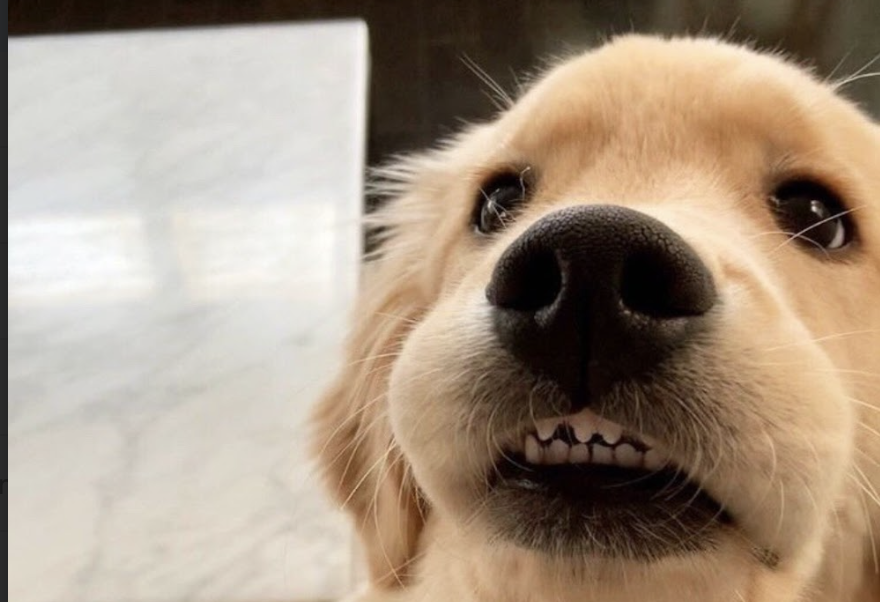

In [2]:
dog_image = Image.open("data/dog.png").convert("RGB")
dog_image

In [3]:
dog_ndarray = np.array(dog_image)

In [4]:
H, W, C = dog_ndarray.shape
print(f"{dog_ndarray.shape = }")
print(f"Interpretation ------ Height {H=}, Width {W=}, Channels {C=}")

dog_ndarray.shape = (602, 880, 3)
Interpretation ------ Height H=602, Width W=880, Channels C=3


## I want to just have a flat array of all the colors

In [5]:
# flatten down to the colors channels
dog_colors = dog_ndarray.reshape(-1, C)
print(f"{np.unique(dog_colors, axis=0).size:,}")

279,744


250k different colors in this image!

In [6]:
print(dog_colors[:10])
dog_colors.shape

[[39 40 42]
 [38 40 42]
 [38 39 41]
 [37 39 41]
 [37 39 40]
 [37 38 40]
 [36 38 39]
 [36 37 39]
 [25 15  7]
 [24 13  6]]


(529760, 3)

Pick the most important color by taking the center of the data

In [7]:
color = dog_colors.mean(axis=0, keepdims=True).astype("int")
print(color)

[[165 149 131]]


replace all the pixels in the image with my one color

In [8]:
num_colors = H*W
new_color_ndarray = np.tile(color, num_colors).reshape(num_colors, 3)

In [9]:
new_image = new_color_ndarray.reshape(H, W, 3)

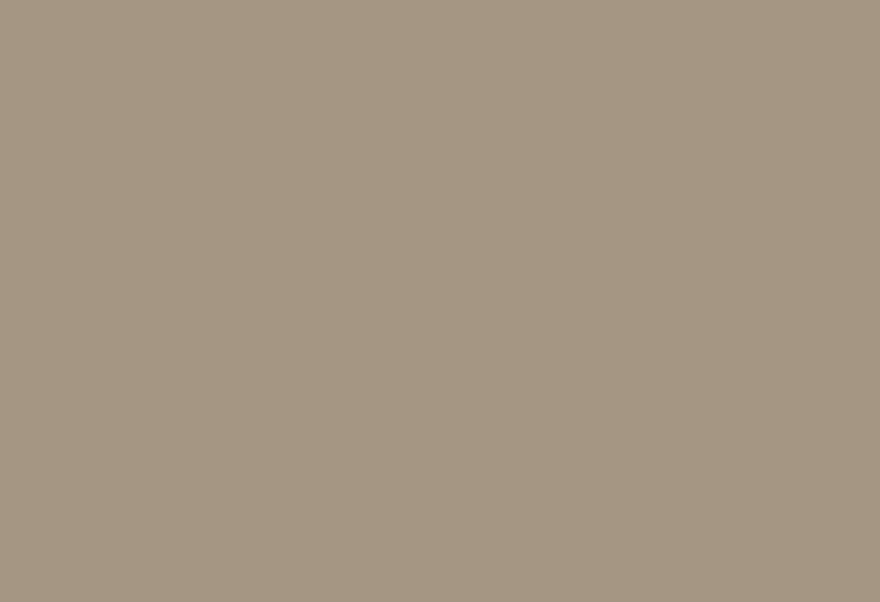

In [13]:
Image.fromarray(np.uint8(new_image))

Not great! But not totally bad either! That kinda looks like the main and important color from the original image.

Now, how about two colors?

I could partition the data, then do an average once again. This is just k-means at play, let's do that.

In [14]:
from sklearn.cluster import KMeans

def k_means(X, k=2):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    return kmeans.cluster_centers_.astype("int"), kmeans.labels_

In [15]:
colors, labels = k_means(dog_colors, k=2)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
colors

array([[ 67,  50,  37],
       [214, 197, 177]])

then assign the original colors based on which color the cluster belonged to

In [17]:
def assign_colors(labels, colors, k=2):
	new_color_ndarray = np.zeros((labels.shape[0], 3))
	for i in range(k):
		new_color_ndarray[labels == i] = colors[i]
	return np.uint8(new_color_ndarray)

new_image = assign_colors(labels, colors, k=2).reshape(H, W, 3)

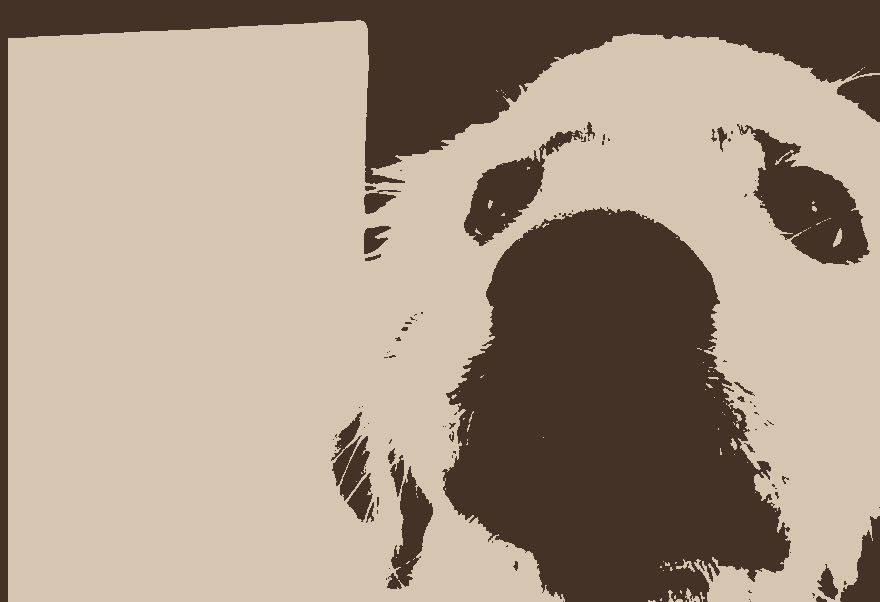

In [18]:
Image.fromarray(new_image)

Awesome! Let's put this in one function and generate a ton at different K

In [19]:
def k_means_quantization(image_ndarray: np.ndarray, k=2):
	H, W, C = image_ndarray.shape
	colors, labels = k_means(image_ndarray.reshape(-1, C), k)
	quantized_image = assign_colors(labels, colors, k).reshape(H, W, C)
	return Image.fromarray(quantized_image.astype(np.uint8))

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


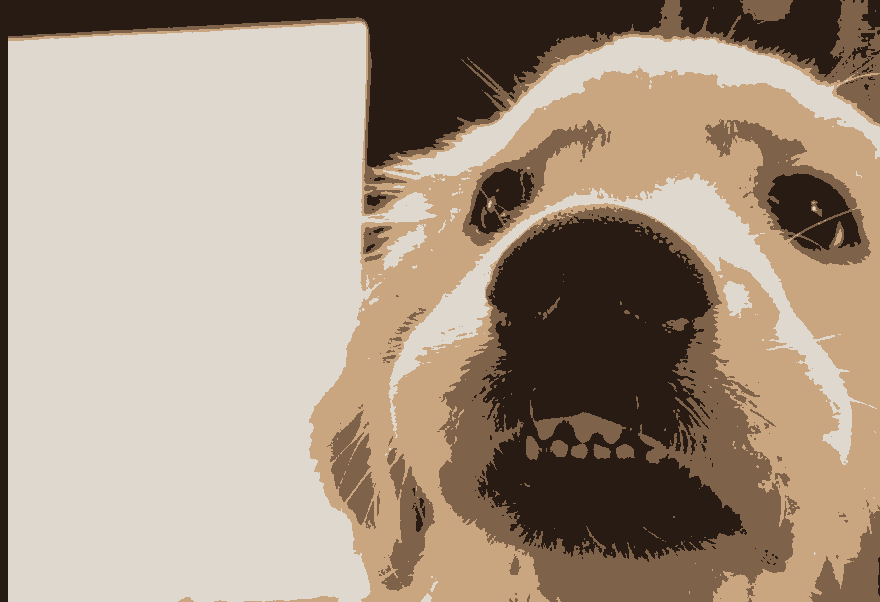

In [116]:
k_means_quantization(image_ndarray=dog_ndarray, k=4)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


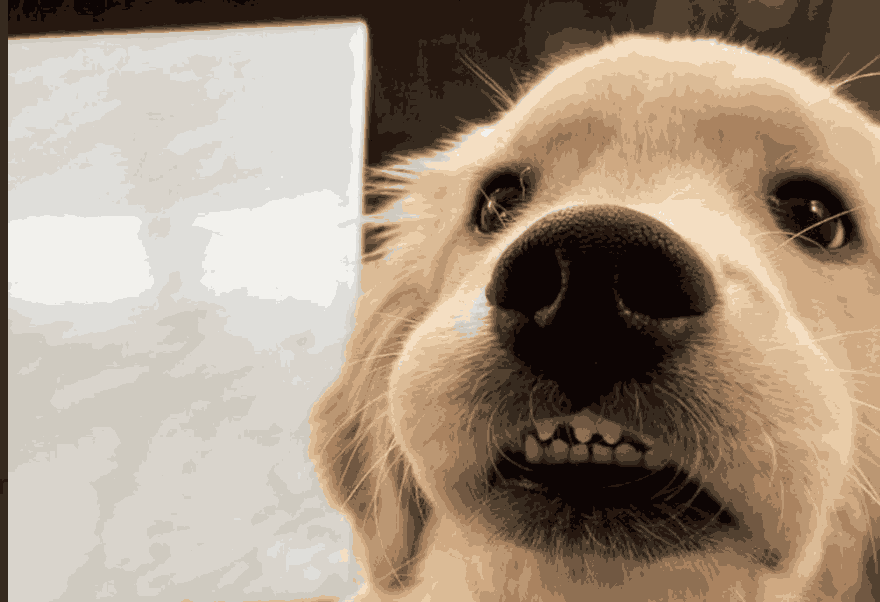

In [117]:
k_means_quantization(image_ndarray=dog_ndarray, k=16)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


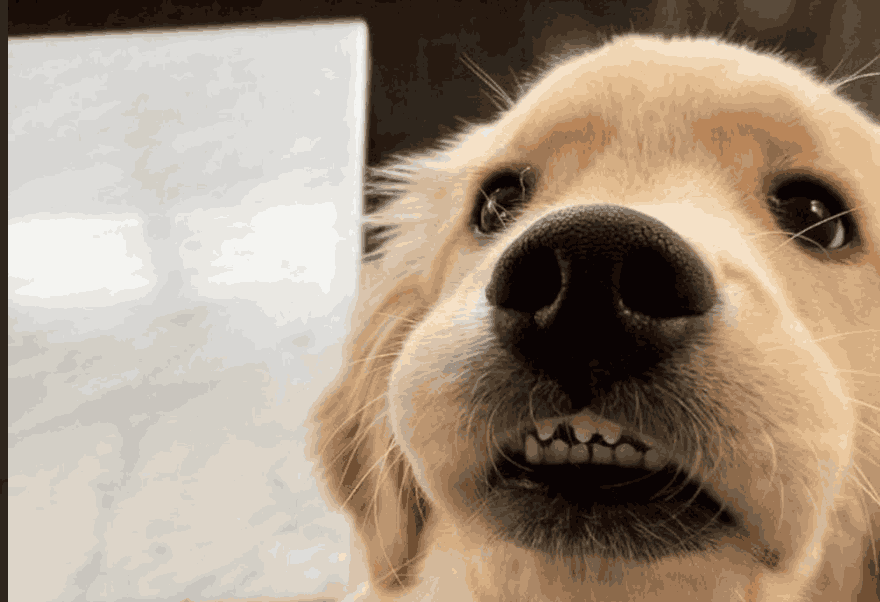

In [118]:
k_means_quantization(image_ndarray=dog_ndarray, k=32)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


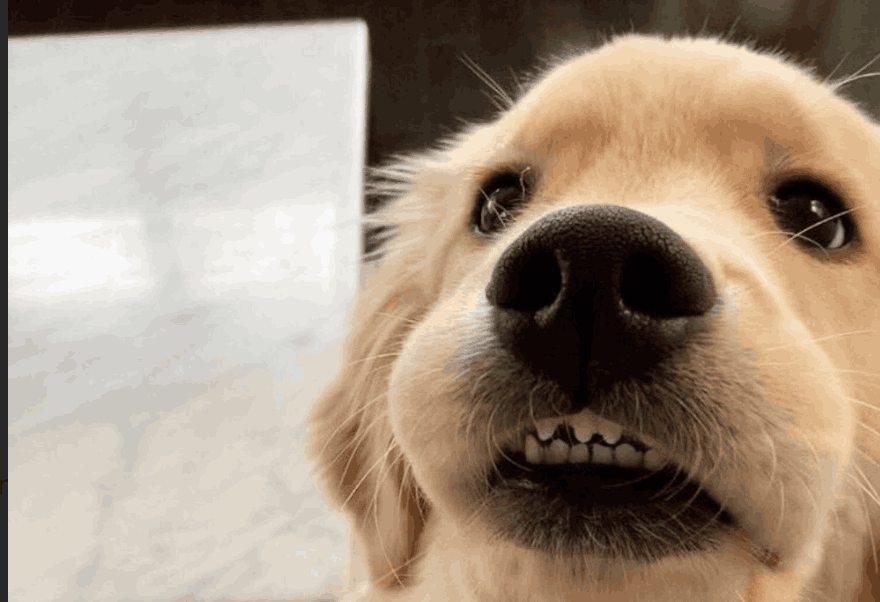

In [119]:
k_means_quantization(image_ndarray=dog_ndarray, k=64)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


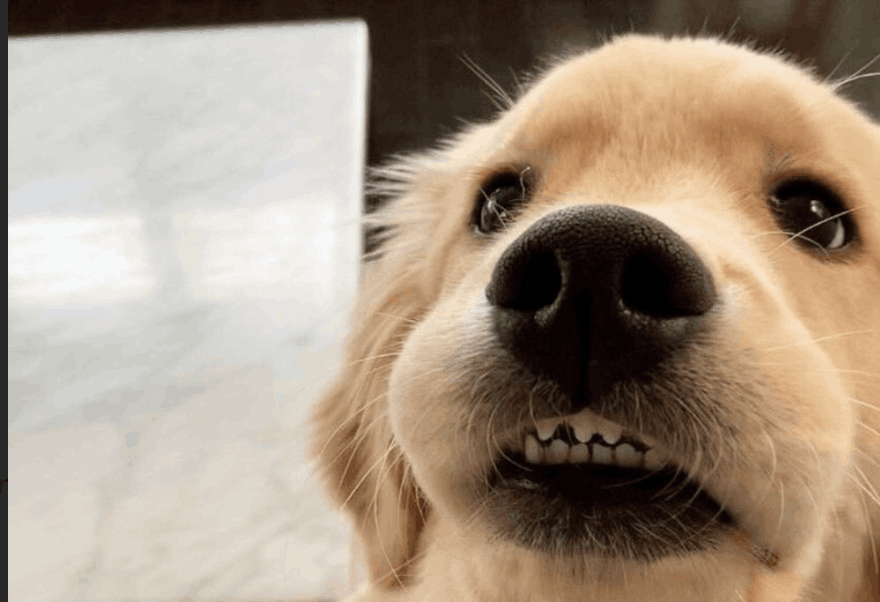

In [120]:
k_means_quantization(image_ndarray=dog_ndarray, k=128)

In [20]:
# sizes = [1, 2, 4, 8, 16, 32, 64, 128]
sizes = [256]
for s in sizes:
    k_means_quantization(dog_ndarray, k=s).save(f"{s}.png")

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
